In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

In [3]:
flights = pd.read_csv('data/Merged_Table_1.csv')
flights.head(5)

,Unnamed: 0,index,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,origin_city_name,dest_city_name,crs_dep_time,dep_delay,taxi_out,...,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,Trip_count_PerDay,Trip_count_Permonth,Trip_count_PerYear,origin_city_condn,dest_city_condn
0,0,0,2018-01-01,WN,5705,"Tampa, FL","Albany, NY",15,28.0,12.0,...,0,160,153.0,134.0,1130,1.001351,30.875000,61.750000,low_rainny,sunny
1,1,1,2018-01-01,WN,988,"New Orleans, LA","Houston, TX",6,-2.0,9.0,...,0,75,69.0,57.0,302,17.332432,534.416667,1068.833333,cloundy,sunny
2,2,2,2018-01-01,WN,1236,"New Orleans, LA","Orlando, FL",5,-1.0,8.0,...,0,100,86.0,70.0,551,5.255405,162.041667,324.083333,cloundy,low_rainny
3,3,3,2018-01-01,WN,233,"New Orleans, LA","Oakland, CA",15,16.0,8.0,...,0,290,283.0,271.0,1903,0.959459,29.583333,59.166667,cloundy,sunny
4,4,4,2018-01-01,WN,446,"New Orleans, LA","St. Louis, MO",18,3.0,6.0,...,0,105,125.0,83.0,604,1.981081,61.083333,122.166667,cloundy,sunny


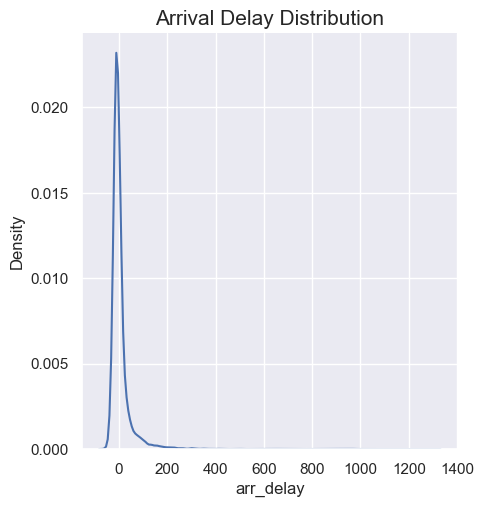

In [5]:
# Arrival Delay Distribution
sns.set_theme(style="darkgrid")
sns.displot(flights, x="arr_delay",kind='kde')
plt.title("Arrival Delay Distribution", size=15)
plt.show()

In [4]:
#Remvoving outliers for Arrival
Q1_arrival = flights.arr_delay.quantile(0.25)
Q3_arrival = flights.arr_delay.quantile(0.75)
IQR = Q3_arrival - Q1_arrival
flights_no_outlier_iqr = flights.loc[(flights['arr_delay'] >= (Q1_arrival - 1.5*IQR))\
                                     & (flights['arr_delay'] <= Q3_arrival + 1.5*IQR)]

In [6]:
#flights_no_outlier_iqr.drop(columns='Unnamed: 0')
flights_no_outlier_iqr.shape, flights_no_outlier_iqr.head(5)

((13273, 27),
    Unnamed: 0  index     fl_date mkt_unique_carrier  mkt_carrier_fl_num  \
 0           0      0  2018-01-01                 WN                5705   
 1           1      1  2018-01-01                 WN                 988   
 2           2      2  2018-01-01                 WN                1236   
 3           3      3  2018-01-01                 WN                 233   
 4           4      4  2018-01-01                 WN                 446   
 
   origin_city_name dest_city_name  crs_dep_time  dep_delay  taxi_out  ...  \
 0        Tampa, FL     Albany, NY            15       28.0      12.0  ...   
 1  New Orleans, LA    Houston, TX             6       -2.0       9.0  ...   
 2  New Orleans, LA    Orlando, FL             5       -1.0       8.0  ...   
 3  New Orleans, LA    Oakland, CA            15       16.0       8.0  ...   
 4  New Orleans, LA  St. Louis, MO            18        3.0       6.0  ...   
 
    diverted  crs_elapsed_time  actual_elapsed_time  air_t

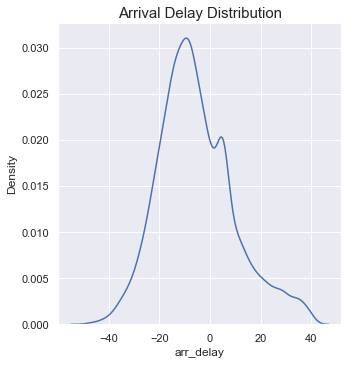

In [7]:
# Arrival Delay Distribution after excluding the outliers
sns.set_theme(style="darkgrid")
sns.displot(flights_no_outlier_iqr, x="arr_delay",kind='kde')
plt.title("Arrival Delay Distribution", size=15)
plt.show()

In [8]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    """This function takes a list of sample (arrival delay airplanes) and 
    sorts them from lowest to highest. It returns a set of (x,y) pairs that represent 
    the delay in minutes and the relative position in the sorted list, or percentile, of each reading.
    """
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [9]:
x, y = ecdf(flights_no_outlier_iqr['arr_delay'])

"""generate 10,000 rows data that follow a normal distribution 
using the mean and the standard deviation of our dataset to scale the range.
"""
samples = np.random.normal(np.mean(flights_no_outlier_iqr['arr_delay']), np.std(flights_no_outlier_iqr['arr_delay']), size=10000)
x_theor, y_theor = ecdf(samples)

"These theoretical examples represent how the data would look if we had \n10,000 samples and the distribution of the data were perfectly normal. \nIt's a hypothetical we can use to compare reality."

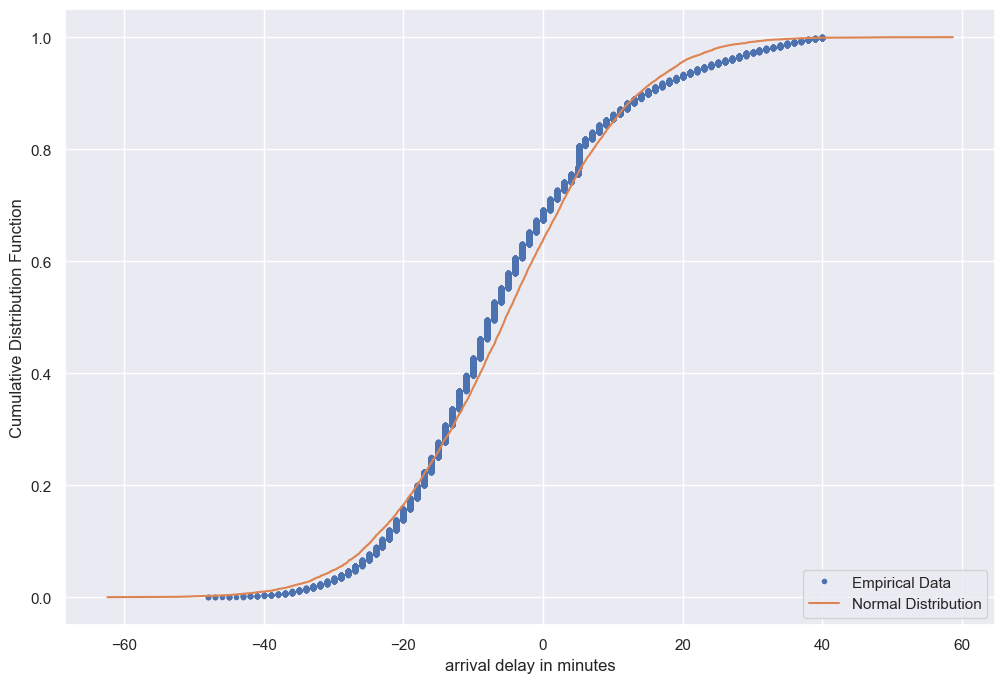

In [10]:
plt.figure(figsize=(12,8))
#sns.set()
plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel("arrival delay in minutes")
plt.ylabel("Cumulative Distribution Function")
#plt.figure(figsize=(12,8))
plt.plot(x_theor, y_theor)
plt.legend(('Empirical Data','Normal Distribution'), loc='lower right')

"""These theoretical examples represent how the data would look if we had 
10,000 samples and the distribution of the data were perfectly normal. 
It's a hypothetical we can use to compare reality."""

"""
In our models we did not drop the outlier for sake of predictions, since we want predict 
the arr_delay as it is
"""